# **Part 1: 5-Fold Validation and Test Set Evaluation**

This block of code imports essential libraries for data analysis and visualization with the diabetes dataset:

1. **NumPy** (import numpy as np): Used for numerical operations and handling arrays.
2. **Matplotlib** (import matplotlib.pyplot as plt): For creating visualizations.
3. **Scikit-learn**:
   - load_diabetes: To load the diabetes dataset.
   - train_test_split, StratifiedKFold: For splitting data into training and testing sets.
   - LinearRegression: To create and train linear regression models.
   - mean_squared_error, r2_score: For evaluating model performance.

These imports facilitate the implementation of linear regression analysis, including data preparation, model training, evaluation, and visualization.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


I load the diabetes dataset with load_diabetes() and split it into training (80%) and testing (20%) sets using train_test_split(). This setup allows me to train the model effectively while reserving data for testing, ensuring reproducibility with random_state=42.

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


I initialize arrays to store the results of the model evaluation. The train_mse array has a size of 5 to hold the Mean Squared Error (MSE) for each fold in the 5-fold validation. Additionally, I create three more arrays—test_mse, test_rmse, and test_r2—each with a size of 5 to store the MSE, Root Mean Squared Error (RMSE), and R² scores for the test set across the different folds. This structure helps in summarizing the model's performance.

In [3]:
# Initialize arrays to store the results
train_mse = np.zeros((5,))  # 5-fold validation
test_mse = np.zeros(5)
test_rmse = np.zeros(5)
test_r2 = np.zeros(5)

I create a StratifiedKFold splitter with 5 splits to ensure that each fold maintains a representative distribution of the target variable. This stratification is important for avoiding bias in model training and validation, particularly when the target variable has imbalanced classes. By using this splitter, I can effectively evaluate the model's performance across different subsets of the data while preserving the underlying distribution.

In [4]:
# Create a StratifiedKFold splitter
skf = StratifiedKFold(n_splits=5)

In this section, I perform 5-fold validation to build models and calculate the Mean Squared Error (MSE). For each fold, I use the StratifiedKFold splitter to obtain training and validation indices. I then create separate training and validation sets, X_train_fold and X_val_fold, along with their corresponding target values. Next, I instantiate a LinearRegression model and fit it to the training fold. After training, I evaluate the model's performance on the validation set by making predictions with model.predict(). Finally, I compute the MSE for the predictions and store it in the train_mse array for later analysis. This process ensures a thorough evaluation of the model's performance across different subsets of the training data.

In [5]:
# 5-fold validation to build models and calculate mean and std
for j, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    X_train_fold = X_train[train_index]
    y_train_fold = y_train[train_index]
    X_val_fold = X_train[val_index]
    y_val_fold = y_train[val_index]

    # Create and train a linear regression model
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation set
    y_pred = model.predict(X_val_fold)
    train_mse[j] = mean_squared_error(y_val_fold, y_pred)

C:\Users\Arafat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


I calculate the mean and standard deviation of the training Mean Squared Error (MSE) using the np.mean() and np.std() functions. The train_mse_mean variable stores the average MSE across the 5 folds, providing an overall indication of the model's performance during cross-validation. Meanwhile, the train_mse_std variable captures the variability in the MSE values, helping me understand how consistently the model performs across different subsets of the training data. This statistical analysis aids in assessing the model's robustness.

In [6]:
# Calculate mean and standard deviation of train MSE
train_mse_mean = np.mean(train_mse)
train_mse_std = np.std(train_mse)

In [7]:
# Print the results of Part 1
print("Part 1: Training MSE (Mean ± Std):")
print(f"{train_mse_mean:.4f} ± {train_mse_std:.4f}")

Part 1: Training MSE (Mean ± Std):
3101.6034 ± 576.5678


I evaluate the final model's performance on the test set by first fitting it to the entire training dataset using model.fit(X_train, y_train). After training, I predict the target values for the test set with model.predict(X_test). I then calculate the Mean Squared Error (MSE) of the predictions using mean_squared_error(), which I store in test_mse_final. To assess the model's accuracy further, I compute the Root Mean Squared Error (RMSE) by taking the square root of the MSE. Lastly, I evaluate the model's explanatory power with the R² score using r2_score(), which indicates how well the model explains the variance in the target variable. These metrics provide a comprehensive evaluation of the model's performance on unseen data.

In [8]:
# Evaluate the models on the test set
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
test_mse_final = mean_squared_error(y_test, y_pred_test)
test_rmse_final = np.sqrt(test_mse_final)
test_r2_final = r2_score(y_test, y_pred_test)

In [9]:
# Print the results of Part 1
print("\nPart 1: Test Set Evaluation:")
print(f"MSE: {test_mse_final:.4f}, RMSE: {test_rmse_final:.4f}, R²: {test_r2_final:.4f}")


Part 1: Test Set Evaluation:
MSE: 2900.1936, RMSE: 53.8534, R²: 0.4526


I create a visualization of the training Mean Squared Error (MSE) using Matplotlib. I set the figure size to 8 by 5 inches for better readability. The plt.errorbar() function is used to plot the mean training MSE along with its standard deviation as error bars. I specify the x-axis to represent the model (in this case, "Linear Regression") and label the y-axis as "Mean Squared Error (MSE)." The error bars have a cap size of 5 for clarity. I also add a grid to enhance the plot's readability and display the title "Training MSE (Part 1)." Finally, I call plt.show() to render the plot, allowing me to visually assess the model's training performance along with its variability.

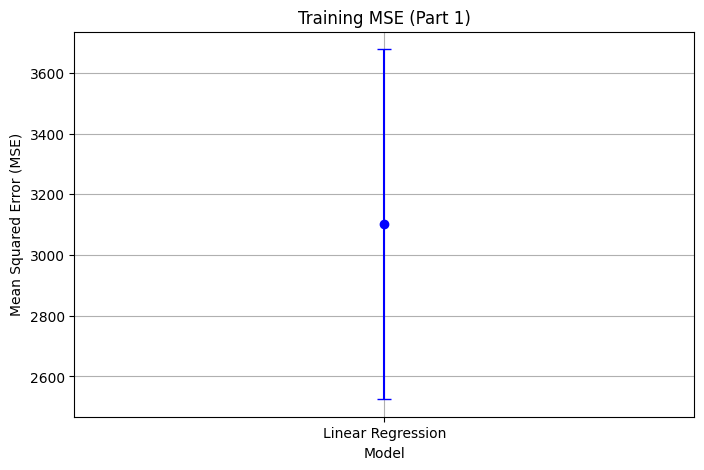

In [10]:
# Visualization of Training MSE
plt.figure(figsize=(8, 5))
plt.errorbar([1], [train_mse_mean], yerr=[train_mse_std], fmt='o', color='blue', capsize=5)
plt.title('Training MSE (Part 1)')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks([1], ['Linear Regression'])
plt.grid()
plt.show()


# **Part 2: Build a Pipeline with Polynomial Features and 5-Fold Validation**

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
# Split the data into training and testing sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I define the degrees of the polynomial to try in the polynomial regression model by creating a list called degrees, which contains the values 1, 2, 3, and 4. This list represents the polynomial degrees that will be evaluated during the model training and validation process. By experimenting with these different degrees, I can determine which polynomial degree best captures the underlying relationship in the data and minimizes the error, ultimately leading to improved model performance.

In [13]:
# Define the degrees of the polynomial to try
degrees = [1, 2, 3, 4]

I initialize arrays to store the results of the polynomial regression evaluation. The train_mse array is created with dimensions corresponding to the number of polynomial degrees being tested (length of degrees) and the number of folds in the 5-fold validation, allowing me to store the Mean Squared Error (MSE) for each degree across all folds. Additionally, I create three more arrays—test_mse, test_rmse, and test_r2—each with a size equal to the number of polynomial degrees. These arrays will hold the MSE, Root Mean Squared Error (RMSE), and R² scores for the test set corresponding to each polynomial degree. This structure helps in summarizing the model's performance for different polynomial configurations effectively.

In [14]:
# Initialize arrays to store the results
train_mse = np.zeros((len(degrees), 5))  # 5-fold validation
test_mse = np.zeros(len(degrees))
test_rmse = np.zeros(len(degrees))
test_r2 = np.zeros(len(degrees))


In this section, I create a StratifiedKFold splitter with 5 splits to ensure a representative distribution of the target variable during the 5-fold validation. For each polynomial degree defined earlier, I iterate through the folds, obtaining training and validation indices. I then create training and validation sets for both features and target values.

Next, I define a pipeline using the Pipeline class, which consists of two steps: the PolynomialFeatures transformer to create polynomial features of the specified degree, and the LinearRegression estimator to fit the model. This pipeline simplifies the workflow by allowing me to chain the preprocessing and modeling steps together.

I train the model on the current fold using pipe.fit(X_train_fold, y_train_fold), and then evaluate its performance on the validation set by making predictions with pipe.predict(X_val_fold). I calculate the Mean Squared Error (MSE) for the predictions and store it in the train_mse array, organized by polynomial degree and fold. This process enables me to assess the model's performance for different polynomial configurations systematically.












In [15]:
# Create a StratifiedKFold splitter
skf = StratifiedKFold(n_splits=5)

# Part 2: 5-fold validation to build models and calculate mean and std using Pipeline
for i, degree in enumerate(degrees):
    for j, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
        X_train_fold = X_train[train_index]
        y_train_fold = y_train[train_index]
        X_val_fold = X_train[val_index]
        y_val_fold = y_train[val_index]

        # Define the pipeline
        pipe = Pipeline(steps=[
            ('preprocessor', PolynomialFeatures(degree=degree)),
            ('estimator', LinearRegression())
        ])

        # Train the model on the current fold
        pipe.fit(X_train_fold, y_train_fold)

        # Evaluate the model on the validation set
        y_pred = pipe.predict(X_val_fold)
        train_mse[i, j] = mean_squared_error(y_val_fold, y_pred)

C:\Users\Arafat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Arafat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Arafat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Arafat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


I calculate the mean and standard deviation of the training Mean Squared Error (MSE) for each polynomial degree using `np.mean()` and `np.std()`, specifying `axis=1` to operate along the rows. The `train_mse_mean` variable holds the average MSE across the 5 folds for each polynomial degree, providing insight into the overall performance of the model for different degrees. Meanwhile, the `train_mse_std` variable captures the variability in MSE values for each degree, indicating how consistently the model performs during cross-validation. This statistical analysis helps me identify which polynomial degree yields the best performance while considering its stability across the folds.

In [16]:
# Calculate mean and standard deviation of train MSE for each degree
train_mse_mean = np.mean(train_mse, axis=1)
train_mse_std = np.std(train_mse, axis=1)

I print the results of Part 2, displaying the training Mean Squared Error (MSE) along with its standard deviation for each polynomial degree evaluated using the pipeline. The output includes a header indicating that the results are for training MSE in relation to polynomial degrees.

I use a `for` loop to iterate through the polynomial degrees, their corresponding mean MSE values, and standard deviations, all packed together using the `zip()` function. For each degree, I format the output to show the mean and standard deviation rounded to four decimal places, providing a clear and concise summary of the model's performance for each degree. This output allows me to easily compare how different polynomial degrees affect the model's training error and stability.

In [17]:
# Print the results of Part 2
print("Part 2: Training MSE (Mean ± Std) for each Polynomial Degree using Pipeline:")
for degree, mean, std in zip(degrees, train_mse_mean, train_mse_std):
    print(f"Degree {degree}: {mean:.4f} ± {std:.4f}")


Part 2: Training MSE (Mean ± Std) for each Polynomial Degree using Pipeline:
Degree 1: 3101.6034 ± 576.5678
Degree 2: 5124.1651 ± 1051.4717
Degree 3: 9105257.5787 ± 10487194.8980
Degree 4: 234278.9311 ± 149904.0056


I evaluate the performance of each polynomial regression model on the test set. For each degree in the predefined list, I first define a pipeline that consists of two steps: the `PolynomialFeatures` transformer to create polynomial features of the current degree and the `LinearRegression` estimator to fit the model.

Next, I train the model on the entire training set using `pipe.fit(X_train, y_train)`. After training, I make predictions on the test set with `pipe.predict(X_test)`. I then calculate the Mean Squared Error (MSE) of the predictions and store it in the `test_mse` array. To further assess the model's performance, I compute the Root Mean Squared Error (RMSE) by taking the square root of the MSE and store it in the `test_rmse` array. Lastly, I evaluate the R² score using `r2_score()` to measure how well the model explains the variance in the target variable, storing the results in the `test_r2` array. This process allows me to comprehensively assess how well each polynomial degree performs on unseen data.

In [18]:
# Evaluate the models on the test set
for i, degree in enumerate(degrees):
    # Define the pipeline
    pipe = Pipeline(steps=[
        ('preprocessor', PolynomialFeatures(degree=degree)),
        ('estimator', LinearRegression())
    ])

    # Train the model on the entire training set
    pipe.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = pipe.predict(X_test)
    test_mse[i] = mean_squared_error(y_test, y_pred)
    test_rmse[i] = np.sqrt(test_mse[i])
    test_r2[i] = r2_score(y_test, y_pred)

I print the results of Part 2, focusing on the evaluation of the polynomial regression models on the test set. The output begins with a header that specifies it pertains to the test set evaluation for each polynomial degree.

Using a for loop, I iterate through the polynomial degrees along with their corresponding test MSE, RMSE, and R² values, which are organized together using the zip() function. For each degree, I format the output to display the MSE, RMSE, and R² score, all rounded to four decimal places. This structured output provides a clear summary of how each polynomial degree performs on the test set, enabling easy comparison of model performance based on different polynomial complexities.

In [19]:
# Print the results of Part 2
print("\nPart 2: Test Set Evaluation for Each Polynomial Degree:")
for degree, mse, rmse, r2 in zip(degrees, test_mse, test_rmse, test_r2):
    print(f"Degree {degree} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Part 2: Test Set Evaluation for Each Polynomial Degree:
Degree 1 - MSE: 2900.1936, RMSE: 53.8534, R²: 0.4526
Degree 2 - MSE: 3096.0283, RMSE: 55.6420, R²: 0.4156
Degree 3 - MSE: 88093.7528, RMSE: 296.8059, R²: -15.6273
Degree 4 - MSE: 146907.5935, RMSE: 383.2853, R²: -26.7281


I create a visualization of the training Mean Squared Error (MSE) for each polynomial degree using a scatter plot with error bars. The `plt.figure(figsize=(8, 5))` line sets the figure size for better visibility.

Using `plt.errorbar()`, I plot the polynomial degrees on the x-axis and the corresponding mean training MSE values on the y-axis. The `yerr` parameter incorporates the standard deviation of the training MSE, providing insight into the variability of the model's performance across different folds. The format `'o'` specifies the marker style, while `color='blue'` sets the color of the markers, and `capsize=5` adjusts the size of the caps on the error bars.

I add a title, labels for the x and y axes, and set the x-ticks to match the polynomial degrees using `plt.xticks(degrees)`. Finally, I enable the grid for easier reading of the plot and display it with `plt.show()`. This visualization helps me understand how the training MSE changes with different polynomial degrees, highlighting the best-performing configurations.

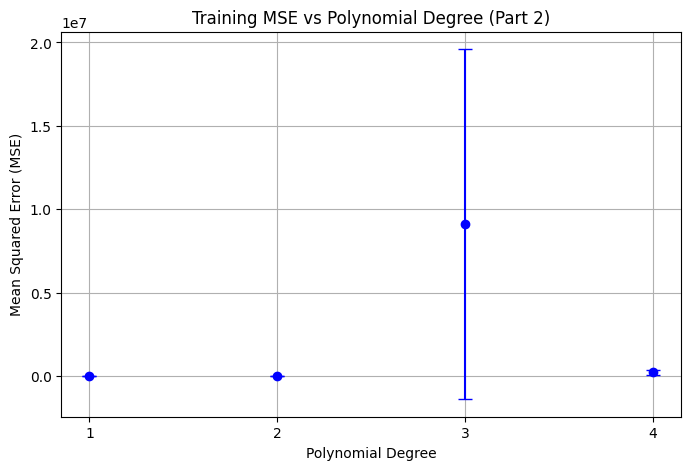

In [20]:
# Visualization of Training MSE
plt.figure(figsize=(8, 5))
plt.errorbar(degrees, train_mse_mean, yerr=train_mse_std, fmt='o', color='blue', capsize=5)
plt.title('Training MSE vs Polynomial Degree (Part 2)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(degrees)
plt.grid()
plt.show()
